In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
# to upload and read data in google colab
import re
import io
from google.colab import files
from google.colab import drive
# for graph and plottings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_palette(palette = "rainbow")
%matplotlib inline
# for changing topics from string to numeric
from sklearn.preprocessing import LabelEncoder
# for normalising scores
from sklearn.preprocessing import PowerTransformer
# NLP preprocessing
import string
import re
import nltk
# for tokenizing
from nltk.tokenize import word_tokenize
nltk.download('punkt')
# for stop words
!pip install PySastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.2 MB/s eta 0:00:00


In [2]:
uploaded = files.upload()

Saving CMP_dataset.csv to CMP_dataset.csv


###Data Exploration


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['CMP_dataset.csv']), sep = ';');
df.head()

Answer   Manual1   Manual2  \
0  Komputer adalah serangkaian ataupun sekelompok...        60       95   
1                  komputer adalah mesin penghitung         10       15   
2  mesin yang membantu manusia untuk menjalankan ...        30       20   
3  Komputer adalah alat komputasi yang diciptakan...        12       10   
4                    alat untuk memudahkan masnusia         14       10   

   Manual3    Avg  Rounded Topic  
0       75  76.67       80  Tech  
1       10  11.67       10  Tech  
2       25  25.00       30  Tech  
3       10  10.67       10  Tech  
4       10  11.33       10  Tech

In [4]:
df.describe()

Manual1       Manual2      Manual3          Avg      Rounded
count  2162.000000  2162.000000  2162.000000  2162.000000  2162.000000
mean     39.464847    42.571230    43.034228    41.690176    42.090657
std      25.694138    29.197738    27.623732    26.929389    27.286254
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%      20.000000    20.000000    25.000000    22.330000    20.000000
50%      35.000000    35.000000    50.000000    40.000000    40.000000
75%      52.000000    60.000000    50.000000    55.000000    60.000000
max     100.000000   100.000000   100.000000   100.000000   100.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2162 entries, 0 to 2161
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Answer    2162 non-null   object 
 1   Manual1   2162 non-null   int64  
 2   Manual2   2162 non-null   int64  
 3   Manual3   2162 non-null   int64  
 4   Avg       2162 non-null   float64
 5   Rounded   2162 non-null   int64  
 6   Topic     2162 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 118.4+ KB


In [6]:
df.shape

(2162, 7)

<Axes: xlabel='Topic', ylabel='Count'>

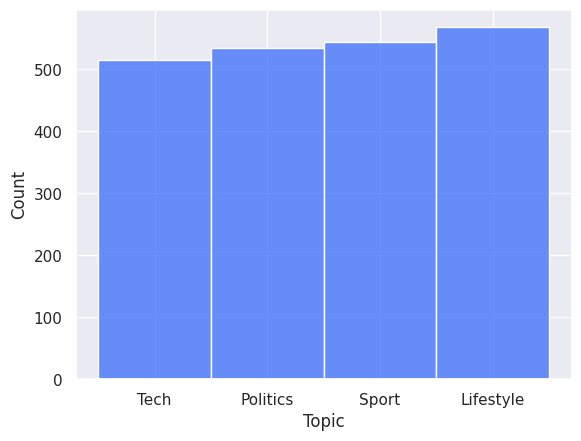

In [7]:
sns.histplot(df['Topic'])

In [8]:
df.kurtosis()

<ipython-input-8-c7edf97eb14c>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


Manual1    -0.264186
Manual2    -0.734023
Manual3    -0.741199
Avg        -0.561859
Rounded    -0.574928
dtype: float64

In [9]:
# Check skewness
old_skew = df.skew().sort_values(ascending=False)
old_skew

<ipython-input-9-5a09cefa834f>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  old_skew = df.skew().sort_values(ascending=False)


Manual1     0.701038
Rounded     0.599179
Avg         0.598178
Manual2     0.552339
Manual3     0.520533
dtype: float64

<ipython-input-10-4bd1cf1c1ec4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg'])


<Axes: xlabel='Avg', ylabel='Density'>

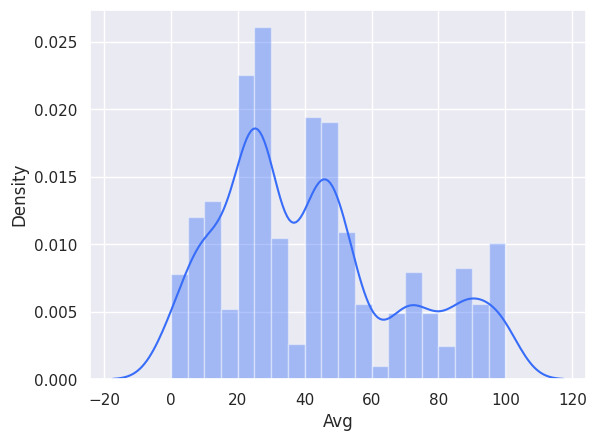

In [10]:
# Plot skewness
sns.distplot(df['Avg'])

In [11]:
# transform dataset to normalise the distribution
yeojohnTr = PowerTransformer(standardize=True)
def yeojohntrans(feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)

    df_yeojohn = pd.DataFrame(yeojohnTr.fit_transform(df[feature].values.reshape(-1,1)))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_yeojohn,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_yeojohn.skew()[0],2)} after Yeo-johnson transformation.")

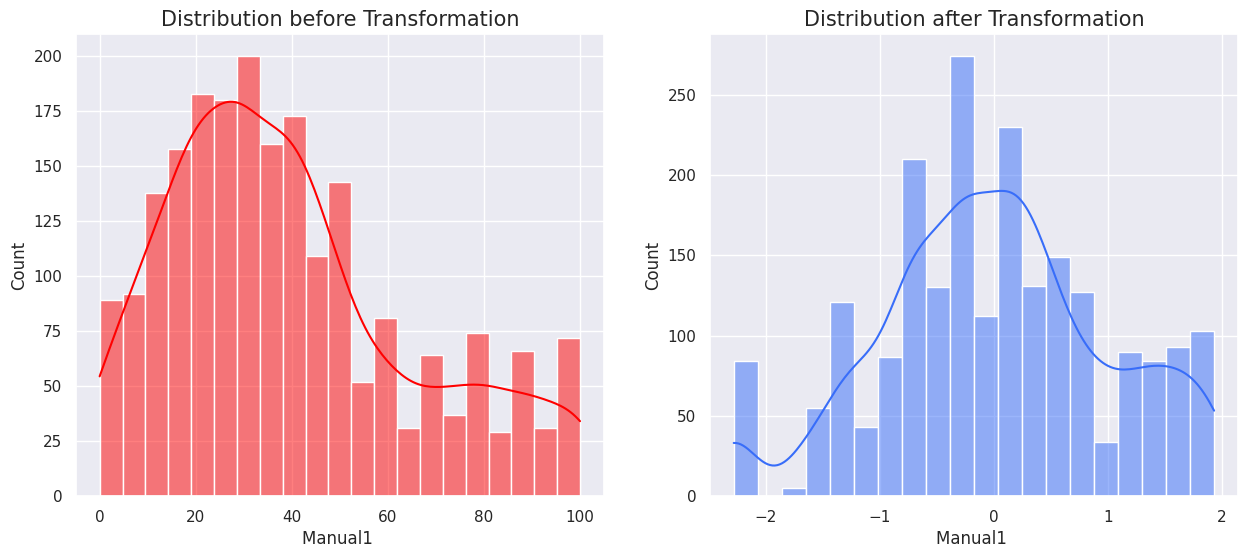

Skewness was 0.7 before & is -0.07 after Yeo-johnson transformation.


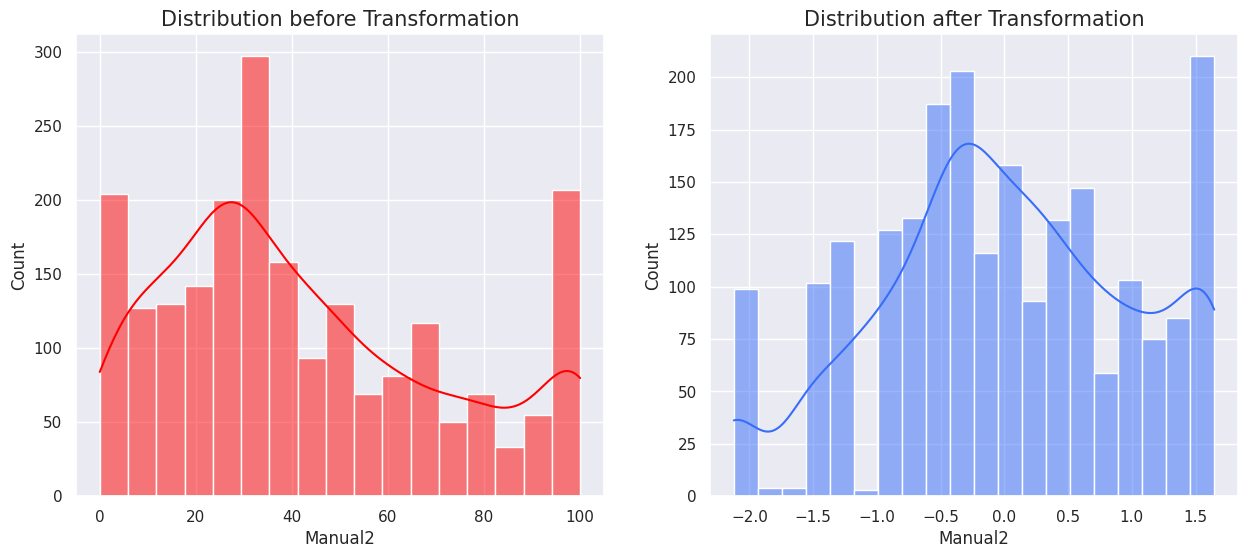

Skewness was 0.55 before & is -0.14 after Yeo-johnson transformation.


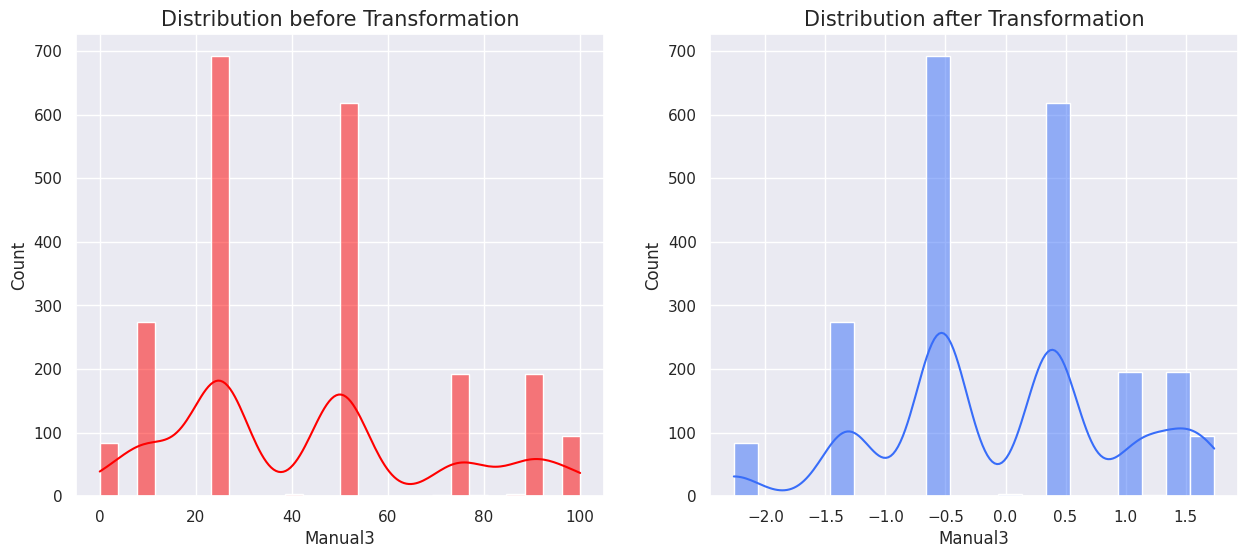

Skewness was 0.52 before & is -0.11 after Yeo-johnson transformation.


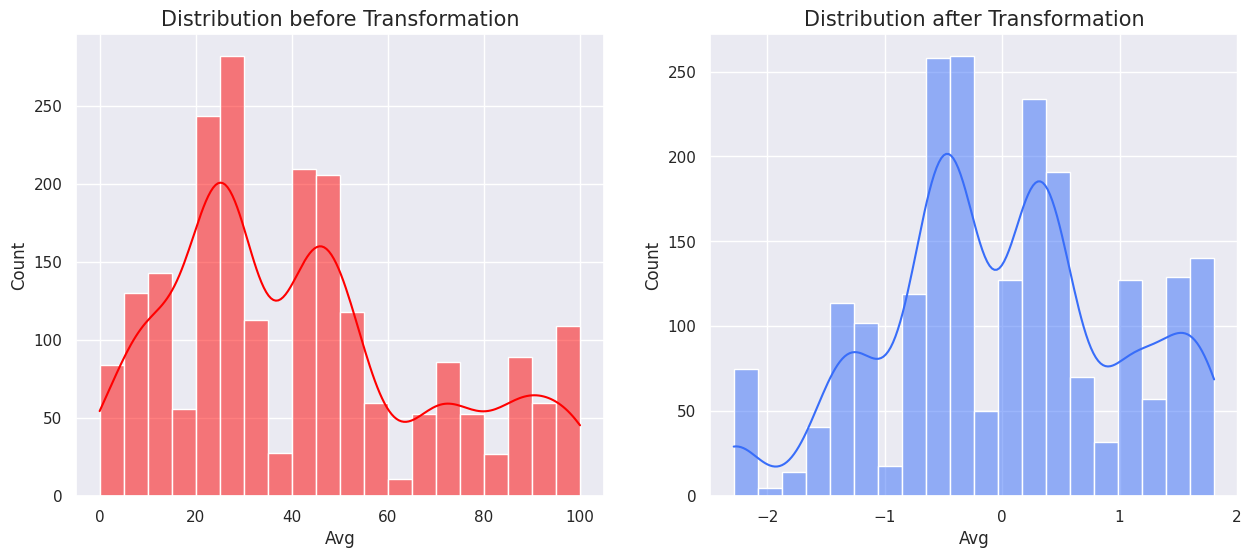

Skewness was 0.6 before & is -0.09 after Yeo-johnson transformation.


In [12]:
for i in df.columns[1:5]:
    yeojohntrans(i)

In [13]:
df_trans = pd.DataFrame(yeojohnTr.fit_transform(df['Avg'].values.reshape(-1,1)))
df['YeoJohn'] = df_trans
df.head()

Answer   Manual1   Manual2  \
0  Komputer adalah serangkaian ataupun sekelompok...        60       95   
1                  komputer adalah mesin penghitung         10       15   
2  mesin yang membantu manusia untuk menjalankan ...        30       20   
3  Komputer adalah alat komputasi yang diciptakan...        12       10   
4                    alat untuk memudahkan masnusia         14       10   

   Manual3    Avg  Rounded Topic   YeoJohn  
0       75  76.67       80  Tech  1.222502  
1       10  11.67       10  Tech -1.185640  
2       25  25.00       30  Tech -0.494429  
3       10  10.67       10  Tech -1.249161  
4       10  11.33       10  Tech -1.206964

In [14]:
# normalise the score range to be 0 to 1
min_range = min(df['YeoJohn'])
max_range = max(df['YeoJohn'])
def normalize(x,mi,ma):
    x = (x-mi)/(ma-mi)
    return x

df['Normalised']=df.apply(lambda x:normalize(x['YeoJohn'],min_range,max_range),axis=1)
df['Normalised']

0       0.857495
1       0.268982
2       0.437903
3       0.253458
4       0.263771
          ...   
2157    0.448680
2158    0.634587
2159    0.041967
2160    0.214483
2161    0.408136
Name: Normalised, Length: 2162, dtype: float64

<ipython-input-15-4c1a2263f7d7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Normalised'])


<Axes: xlabel='Normalised', ylabel='Density'>

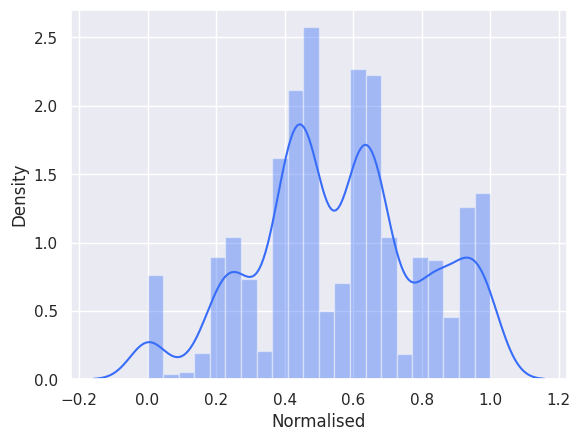

In [15]:
sns.distplot(df['Normalised'])

In [16]:
df.describe()

Manual1       Manual2      Manual3          Avg      Rounded  \
count  2162.000000  2162.000000  2162.000000  2162.000000  2162.000000   
mean     39.464847    42.571230    43.034228    41.690176    42.090657   
std      25.694138    29.197738    27.623732    26.929389    27.286254   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      20.000000    20.000000    25.000000    22.330000    20.000000   
50%      35.000000    35.000000    50.000000    40.000000    40.000000   
75%      52.000000    60.000000    50.000000    55.000000    60.000000   
max     100.000000   100.000000   100.000000   100.000000   100.000000   

            YeoJohn   Normalised  
count  2.162000e+03  2162.000000  
mean   2.366285e-16     0.558734  
std    1.000231e+00     0.244441  
min   -2.286289e+00     0.000000  
25%   -6.162346e-01     0.408136  
50%    1.016666e-01     0.583580  
75%    6.012861e-01     0.705680  
max    1.805618e+00     1.000000

In [17]:
# dropping unnecessary columns
df.drop(['Avg','Rounded','YeoJohn'],axis=1,inplace=True)
df.head()

Answer   Manual1   Manual2  \
0  Komputer adalah serangkaian ataupun sekelompok...        60       95   
1                  komputer adalah mesin penghitung         10       15   
2  mesin yang membantu manusia untuk menjalankan ...        30       20   
3  Komputer adalah alat komputasi yang diciptakan...        12       10   
4                    alat untuk memudahkan masnusia         14       10   

   Manual3 Topic  Normalised  
0       75  Tech    0.857495  
1       10  Tech    0.268982  
2       25  Tech    0.437903  
3       10  Tech    0.253458  
4       10  Tech    0.263771

In [18]:
# change 'Topic' column to numeric
label = LabelEncoder().fit_transform(df['Topic'])
df['Topic'] = label
df.head()

Answer   Manual1   Manual2  \
0  Komputer adalah serangkaian ataupun sekelompok...        60       95   
1                  komputer adalah mesin penghitung         10       15   
2  mesin yang membantu manusia untuk menjalankan ...        30       20   
3  Komputer adalah alat komputasi yang diciptakan...        12       10   
4                    alat untuk memudahkan masnusia         14       10   

   Manual3  Topic  Normalised  
0       75      3    0.857495  
1       10      3    0.268982  
2       25      3    0.437903  
3       10      3    0.253458  
4       10      3    0.263771

###NLP Preprocessing

In [19]:
# case folding
def casefold(essay):
  essay = essay.lower()
  return essay

df['CleanAnswer'] = df['Answer '].apply(lambda x:casefold(x))

In [20]:
# remove symbols, punctuations, numbers, whitespace
def numremove(essay):
  essay = re.sub(r"\d+", "", essay)
  return essay

df['CleanAnswer'] = df['CleanAnswer'].apply(lambda x:numremove(x))

def puncremove(essay):
  essay = essay.translate(str.maketrans("","",string.punctuation))
  return essay

df['CleanAnswer'] = df['CleanAnswer'].apply(lambda x:puncremove(x))

def wspaceremove(essay):
  essay = essay.strip()
  return essay

df['CleanAnswer'] = df['CleanAnswer'].apply(lambda x:wspaceremove(x))

def mwspaceremove(essay):
  essay = re.sub('\s+',' ',essay)
  return essay

df['CleanAnswer'] = df['CleanAnswer'].apply(lambda x:mwspaceremove(x))

In [21]:
# stemming
Factory = StemmerFactory()
Stemmer = Factory.create_stemmer()
def stem(essay):
  essay = Stemmer.stem(essay)
  return essay

df['Stem'] = df['CleanAnswer'].apply(lambda x:stem(x))

In [22]:
uploadsw = files.upload()

Saving id.stopwords.txt to id.stopwords.txt


In [23]:
sw = pd.read_csv(io.BytesIO(uploadsw['id.stopwords.txt']), sep = '/t');
sw.head()

<ipython-input-23-f530c7069461>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  sw = pd.read_csv(io.BytesIO(uploadsw['id.stopwords.txt']), sep = '/t');


IDNStopwordsLists
0               ada
1            adalah
2            adanya
3            adapun
4              agak

In [24]:
sw_set = set(sw['IDNStopwordsLists'])
sw_set

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [25]:
# remove stop words & tokenize
def remove_stop_words(essay):
    word_tokens = word_tokenize(essay)
    filtered_sentence = []
    for w in word_tokens:
        if w not in sw_set:
            filtered_sentence.append(w)
    return filtered_sentence

df['Tokens'] = df['Stem'].apply(lambda x:remove_stop_words(x))
df.head()

Answer   Manual1   Manual2  \
0  Komputer adalah serangkaian ataupun sekelompok...        60       95   
1                  komputer adalah mesin penghitung         10       15   
2  mesin yang membantu manusia untuk menjalankan ...        30       20   
3  Komputer adalah alat komputasi yang diciptakan...        12       10   
4                    alat untuk memudahkan masnusia         14       10   

   Manual3  Topic  Normalised  \
0       75      3    0.857495   
1       10      3    0.268982   
2       25      3    0.437903   
3       10      3    0.253458   
4       10      3    0.263771   

                                         CleanAnswer  \
0  komputer adalah serangkaian ataupun sekelompok...   
1                   komputer adalah mesin penghitung   
2  mesin yang membantu manusia untuk menjalankan ...   
3  komputer adalah alat komputasi yang diciptakan...   
4                     alat untuk memudahkan masnusia   

                                                Stem  \
0  komputer adalah rangkai atau kelompok mesin el...   
1                       komputer adalah mesin hitung   
2  mesin yang bantu manusia untuk jalan segara kerja   
3  komputer adalah alat komputasi yang cipta untu...   
4                          alat untuk mudah masnusia   

                                              Tokens  
0  [komputer, rangkai, kelompok, mesin, elektroni...  
1                          [komputer, mesin, hitung]  
2      [mesin, bantu, manusia, jalan, segara, kerja]  
3   [komputer, alat, komputasi, cipta, hitung, kali]  
4                            [alat, mudah, masnusia]

In [26]:
# count num of words
def noOfWords(essay):
    word=len(essay.split())
    return word
# count num of characters
def noOfChar(essay):
    char=len(essay)
    return char
# count average word length
def avg_word_len(essay):
    try:
      return float(noOfChar(essay))/float(noOfWords(essay))
    except ZeroDivisionError as err:
      return 0

pro_data = df.copy()
pro_data['char_count'] = pro_data['CleanAnswer'].apply(noOfChar)
pro_data['word_count'] = pro_data['CleanAnswer'].apply(noOfWords)
pro_data['avg_word_len'] = pro_data['CleanAnswer'].apply(avg_word_len)

In [27]:
uploadrw = files.upload()

Saving id.allwords.txt to id.allwords.txt


In [28]:
data = open('id.allwords.txt').read()
words = re.findall('[a-z]+', data.lower())

def check_spell_error(essay):
    new_essay = re.sub("[^A-Za-z0-9]"," ",essay)
    new_essay = re.sub("[0-9]","",new_essay)
    count=0
    all_words = new_essay.split()
    for i in all_words:
        if i not in words:
            count+=1
    return count

pro_data['spell_err_count'] = pro_data['Stem'].apply(check_spell_error)
pro_data.head()

Answer   Manual1   Manual2  \
0  Komputer adalah serangkaian ataupun sekelompok...        60       95   
1                  komputer adalah mesin penghitung         10       15   
2  mesin yang membantu manusia untuk menjalankan ...        30       20   
3  Komputer adalah alat komputasi yang diciptakan...        12       10   
4                    alat untuk memudahkan masnusia         14       10   

   Manual3  Topic  Normalised  \
0       75      3    0.857495   
1       10      3    0.268982   
2       25      3    0.437903   
3       10      3    0.253458   
4       10      3    0.263771   

                                         CleanAnswer  \
0  komputer adalah serangkaian ataupun sekelompok...   
1                   komputer adalah mesin penghitung   
2  mesin yang membantu manusia untuk menjalankan ...   
3  komputer adalah alat komputasi yang diciptakan...   
4                     alat untuk memudahkan masnusia   

                                                Stem  \
0  komputer adalah rangkai atau kelompok mesin el...   
1                       komputer adalah mesin hitung   
2  mesin yang bantu manusia untuk jalan segara kerja   
3  komputer adalah alat komputasi yang cipta untu...   
4                          alat untuk mudah masnusia   

                                              Tokens  char_count  word_count  \
0  [komputer, rangkai, kelompok, mesin, elektroni...         359          47   
1                          [komputer, mesin, hitung]          32           4   
2      [mesin, bantu, manusia, jalan, segara, kerja]          62           8   
3   [komputer, alat, komputasi, cipta, hitung, kali]          87          12   
4                            [alat, mudah, masnusia]          30           4   

   avg_word_len  spell_err_count  
0      7.638298                0  
1      8.000000                0  
2      7.750000                0  
3      7.250000                1  
4      7.500000                1

In [29]:
pro_data = pro_data.drop(pro_data[pro_data.word_count < 5].index)
pro_data = pro_data.drop(pro_data[pro_data.CleanAnswer  == 'name'].index)

In [30]:
def to_str(essay):
  essay = str(essay)
  return essay

def to_int(x):
  y = int(x)
  return y

pro_data['Stem'] = pro_data['Stem'].apply(to_str)
pro_data.head()

Answer   Manual1   Manual2  \
0  Komputer adalah serangkaian ataupun sekelompok...        60       95   
2  mesin yang membantu manusia untuk menjalankan ...        30       20   
3  Komputer adalah alat komputasi yang diciptakan...        12       10   
5  Komputer adalah alat yang dipakai untuk mengol...        20       30   
6  komputer merupakan alat untuk mengolah data. m...        40       40   

   Manual3  Topic  Normalised  \
0       75      3    0.857495   
2       25      3    0.437903   
3       10      3    0.253458   
5       25      3    0.437903   
6       50      3    0.612290   

                                         CleanAnswer  \
0  komputer adalah serangkaian ataupun sekelompok...   
2  mesin yang membantu manusia untuk menjalankan ...   
3  komputer adalah alat komputasi yang diciptakan...   
5  komputer adalah alat yang dipakai untuk mengol...   
6  komputer merupakan alat untuk mengolah data me...   

                                                Stem  \
0  komputer adalah rangkai atau kelompok mesin el...   
2  mesin yang bantu manusia untuk jalan segara kerja   
3  komputer adalah alat komputasi yang cipta untu...   
5  komputer adalah alat yang pakai untuk olah dat...   
6  komputer rupa alat untuk olah data laku hitung...   

                                              Tokens  char_count  word_count  \
0  [komputer, rangkai, kelompok, mesin, elektroni...         359          47   
2      [mesin, bantu, manusia, jalan, segara, kerja]          62           8   
3   [komputer, alat, komputasi, cipta, hitung, kali]          87          12   
5  [komputer, alat, pakai, olah, data, prosedur, ...         486          63   
6  [komputer, rupa, alat, olah, data, laku, hitun...         137          17   

   avg_word_len  spell_err_count  
0      7.638298                0  
2      7.750000                0  
3      7.250000                1  
5      7.714286                2  
6      8.058824                1

In [31]:
pro_df = pro_data.loc[(pro_data != 0).any(1)]

<ipython-input-31-1cf7913fbdd3>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  pro_df = pro_data.loc[(pro_data != 0).any(1)]


In [32]:
#Saving processed df to a file
drive.mount('/drive')
pro_df.to_csv("/drive/My Drive/CMP/Preprocessed_data.csv")

Mounted at /drive


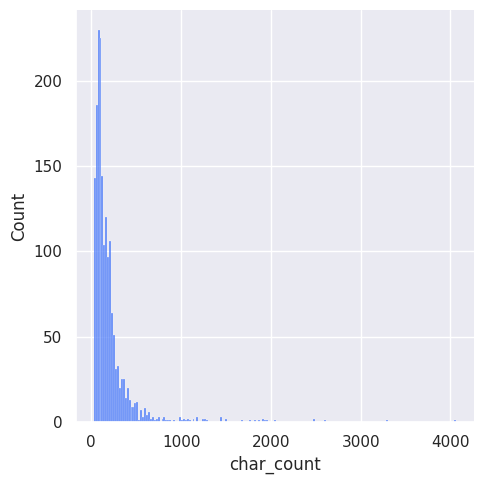

In [33]:
sns.displot(pro_df['char_count'])

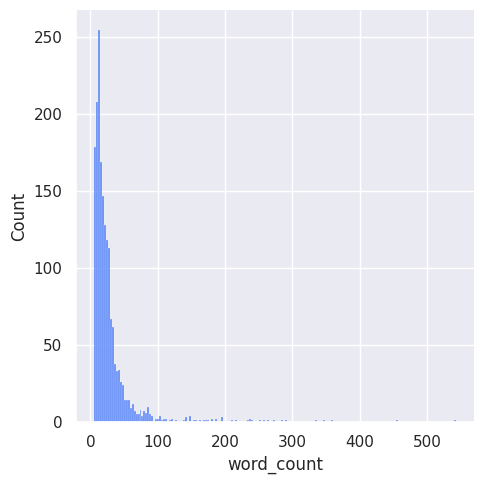

In [34]:
sns.displot(pro_df['word_count'])

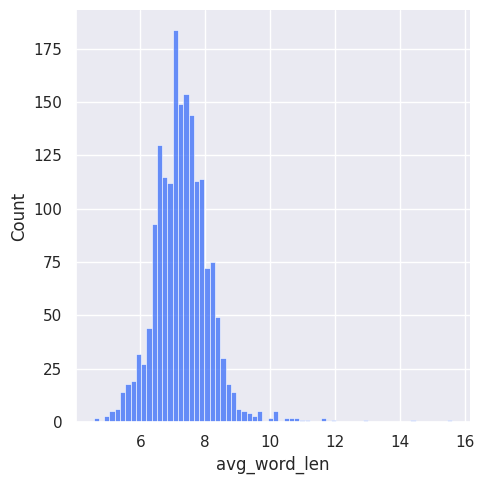

In [35]:
sns.displot(pro_df['avg_word_len'])

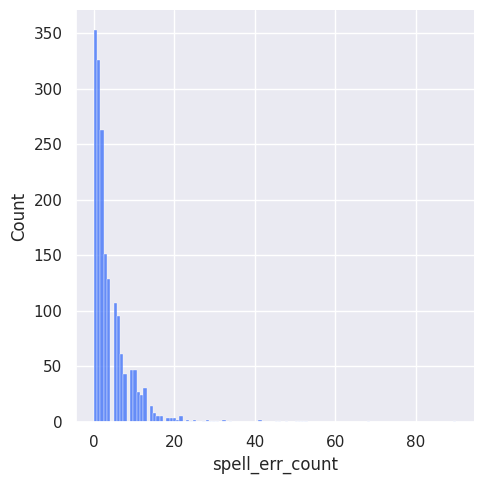

In [36]:
sns.displot(pro_df['spell_err_count'])

<ipython-input-37-09e5cf0ab4c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pro_df.corr())


<Axes: >

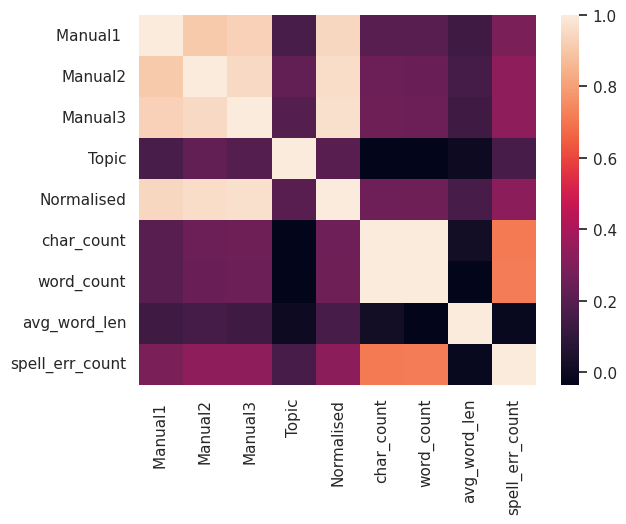

In [37]:
# correlation heatmap
sns.heatmap(pro_df.corr())